In [68]:
# Binned IWP statistics
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.colors as mcolors
from scipy import stats
from utility import analysis_parameters as ap
from utility import util
from matplotlib.gridspec import GridSpec

import dask
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

colors=ap.COLORS

model="ICON"
region="TWP"
chunks={"Xdim":1200, "ncol":1200}
ndays=10
# data_thres = 1e-7
plot_iwc   = True
plot_rhice = False
plot_2d    = True
plot_cre   = False
if model=="GEOS":
    nd=24 # since hourly output
else:
    nd=8 # three hourly output

# IWC or RHice binned by IWP percentiles

plotted against OLR/albedo or LW/SW/net CRE

In [69]:
# pa = xr.open_dataset(ap.TWP+"TWP_3D_GEOS_pa_20200130-20200228.nc", chunks={"time":8,"Xdim":1200}).pa.isel(time=slice(-24,-1))
# pa

In [70]:
# np.nansum(pa)

In [71]:
# load temp, wv, pres, and height
# 3D variables
z = xr.open_dataset(ap.get_file(model, region+"_3D", "zg"), 
                    chunks=chunks).isel(time=slice(-nd*ndays,-1)).zg
if model=="UM":
    z_plot = z.mean(axis=(0,2,3))
else:
    z_plot = z.mean(axis=(0,2))

print(z.shape, z_plot.shape)

if plot_iwc:
    if model=="SCREAM":
        data = xr.open_dataset(ap.get_file(model,"TWP_3D","iwc"), chunks=chunks).pfull.isel(time=slice(-nd*ndays,-1))
        data = data[:,1:]
    elif model=="SHiELD":
        data = xr.open_dataset(ap.get_file(model,"TWP_3D","iwc"), chunks=chunks).iwc.isel(time=slice(-nd*ndays,-1))
    else:
        t = xr.open_dataset(ap.get_file(model, region+"_3D", "ta"),
                                  chunks=chunks).isel(time=slice(-nd*ndays,-1)).ta
        if model=="SCREAM":
            p = t.lev*100 # convert to Pa
        else:
            p = t = xr.open_dataset(ap.get_file(model, region+"_3D", "pa"), 
                            chunks=chunks).isel(time=slice(-nd*ndays,-1)).pa
        qv = xr.open_dataset(ap.get_file(model, region+"_3D", "hus"),
                                  chunks=chunks).isel(time=slice(-nd*ndays,-1)).hus
        qi = xr.open_dataset(ap.get_file(model, region+"_3D", "cli"), 
                            chunks=chunks).isel(time=slice(-nd*ndays,-1)).cli
        if model=="GEOS":
            t = t[::6]
            p = p.sel(time=t.time)
            qv = qv.sel(time=t.time)
            qi = qi.sel(time=t.time)

        ## calculate total water content from mixing ratio 
        data = util.q2wc(t, p, qv, qi)#.sel(model_level_number=z_plot.model_level_number)
        del qi, t, p, qv        
    print(data.shape)

elif plot_rhice:
    # calculate RH
    t = xr.open_dataset(ap.get_file(model, region+"_3D", "ta"), 
                    chunks=chunks).isel(time=slice(-nd*ndays,-1)).ta
    if model=="SCREAM":
        p = t.lev*100 # convert to Pa
    else:
        p = t = xr.open_dataset(ap.get_file(model, region+"_3D", "pa"), 
                        chunks=chunks).isel(time=slice(-nd*ndays,-1)).pa
    qv = xr.open_dataset(ap.get_file(model, region+"_3D", "hus"), 
                        chunks=chunks).isel(time=slice(-nd*ndays,-1)).hus
    data = util.q2rhi(t, p, qv)

    del t,p,qv
del z
data

(79, 76, 195442) (76,)
[########################################] | 100% Completed | 103.55 ms
[########################################] | 100% Completed | 201.16 ms
[########################################] | 100% Completed | 301.46 ms
[########################################] | 100% Completed | 401.72 ms
[########################################] | 100% Completed | 100.91 ms
[########################################] | 100% Completed | 101.44 ms
[########################################] | 100% Completed | 201.48 ms
[########################################] | 100% Completed | 301.07 ms
[########################################] | 100% Completed | 101.07 ms
[########################################] | 100% Completed | 201.45 ms
[########################################] | 100% Completed | 301.40 ms
[########################################] | 100% Completed | 401.18 ms
[########################################] | 100% Completed | 100.75 ms
[########################################

<xarray.DataArray (time: 79, height: 77, cell: 195442)>
dask.array<mul, shape=(79, 77, 195442), dtype=float32, chunksize=(79, 77, 195442), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-02-17T15:00:00 ... 2020-02-28T18:00:00
    clon     (cell) float64 2.531 2.53 2.531 2.531 ... 2.638 2.638 2.639 2.638
    clat     (cell) float64 0.08642 0.08626 0.08626 ... -0.03813 -0.03866
  * height   (height) float64 14.0 15.0 16.0 17.0 18.0 ... 87.0 88.0 89.0 90.0
Dimensions without coordinates: cell

In [72]:
z_plot.values

[########################################] | 100% Completed | 8.37 ss
[########################################] | 100% Completed | 8.47 s
[########################################] | 100% Completed | 8.57 s
[########################################] | 100% Completed | 8.67 s


array([4.5110969e+04, 4.3322035e+04, 4.1589871e+04, 3.9914605e+04,
       3.8293871e+04, 3.6727988e+04, 3.5214605e+04, 3.3753832e+04,
       3.2344732e+04, 3.0985736e+04, 2.9676930e+04, 2.8416967e+04,
       2.7205615e+04, 2.6047959e+04, 2.4947035e+04, 2.3906516e+04,
       2.2928275e+04, 2.2008150e+04, 2.1142736e+04, 2.0329178e+04,
       1.9564115e+04, 1.8844633e+04, 1.8167938e+04, 1.7531742e+04,
       1.6933541e+04, 1.6370961e+04, 1.5841675e+04, 1.5344035e+04,
       1.4876004e+04, 1.4435916e+04, 1.4016178e+04, 1.3609550e+04,
       1.3209319e+04, 1.2809135e+04, 1.2408920e+04, 1.2008672e+04,
       1.1608407e+04, 1.1208180e+04, 1.0807967e+04, 1.0407778e+04,
       1.0007614e+04, 9.6074551e+03, 9.2072607e+03, 8.8070879e+03,
       8.4069707e+03, 8.0068794e+03, 7.6067397e+03, 7.2066650e+03,
       6.8066396e+03, 6.4066592e+03, 6.0066401e+03, 5.6066748e+03,
       5.2128335e+03, 4.8321353e+03, 4.4654585e+03, 4.1127549e+03,
       3.7739111e+03, 3.4489617e+03, 3.1378071e+03, 2.8404934e

In [74]:
# get iwp for 2d and expand to 3d
# iwp = xr.open_dataset(ap.get_file(model, region, "clivi")).isel(time=slice(-96*ndays,-1)).clivi
iwp = ap.load_iwp(model, region, chunks=chunks, total=True).isel(time=slice(-96*ndays,-1))
if model=="SHiELD":
    iwp_expand = iwp.sel(time=data.time).expand_dims({"pfull_ref":data.shape[1]},axis=1)
elif model=="UM":
    iwp_expand = iwp.sel(time=data.time).expand_dims({"model_level_number":data.shape[1]}, axis=1)
else: #geos, scream
    iwp_expand = iwp.sel(time=data.time).expand_dims({"lev":data.shape[1]},axis=1)

iwp = clivi + qsvi + qgvi not defined as a file ICON TWP


UnboundLocalError: local variable 'iwp' referenced before assignment

In [56]:
iwp

<xarray.DataArray 'clivi' (time: 959, latitude: 214, longitude: 142)>
dask.array<getitem, shape=(959, 214, 142), dtype=float32, chunksize=(959, 214, 142), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2020-02-19T00:15:00 ... 2020-02-28T23:45:00
  * longitude  (longitude) float32 143.1 143.1 143.2 143.3 ... 152.8 152.9 153.0
  * latitude   (latitude) float32 -4.992 -4.945 -4.898 ... 4.898 4.945 4.992
Attributes:
    standard_name:  atmosphere_mass_content_of_cloud_ice
    long_name:      TOTAL COLUMN QCF RHO GRID
    units:          kg m-2
    origin:         atmosphere_mass_content_of_cloud_ice

In [57]:
olr.shape, iwp.shape

((720, 214, 142), (959, 214, 142))

In [61]:
if plot_2d:
    # 2D variables
    olr = ap.load_olr(model, region).isel(time=slice(-nd*24,-1))
    alb = ap.load_alb(model, region).isel(time=slice(-nd*24,-1))
    iwp = iwp.sel(time=olr.time)

    print(olr.shape, alb.shape, iwp.shape)
    print(olr.time[5*4].values)

    if plot_cre:
        # calculate lw and sw cre
        if model=="SCREAM":
            olr_str = "rlt"
        else:
            olr_str = "rlut"
        olrcs = xr.open_dataset(ap.get_file(model, region, olr_str+"cs")).isel(time=slice(-96*ndays,-1))[olr_str+"cs"]
        albcs = ap.load_alb(model, region, clearsky=True).isel(time=slice(-96*ndays,-1))
        print(alb.time[0].values, albcs.time[0].values, alb.dims, albcs.dims)
        lwcre = util.get_lwcre(olr, olrcs)
        lwcre = lwcre.compute()
        swcre = util.get_swcre(alb, albcs.values)
        swcre = swcre.where((swcre.time.dt.hour<=6)|(swcre.time.dt.hour>=22)).compute()
        del olrcs, albcs, olr, alb
        netcre = lwcre+swcre.values

False
[########################################] | 100% Completed | 103.67 ms
[########################################] | 100% Completed | 203.68 ms
[########################################] | 100% Completed | 301.69 ms
(191, 214, 142) (191, 214, 142) (191, 214, 142)
2020-02-21T20:30:00.000000000


In [62]:
iwp.shape, iwp_expand.shape

((191, 214, 142), (79, 54, 214, 142))

In [63]:
# del iwp
# data=data.chunk(chunks={'time':8,'lev':50,'Xdim':100})
# data

[########################################] | 100% Completed | 100.82 ms
[########################################] | 100% Completed | 102.84 ms
[########################################] | 100% Completed | 201.01 ms
[########################################] | 100% Completed | 302.48 ms
[########################################] | 100% Completed | 402.81 ms
[########################################] | 100% Completed | 502.71 ms


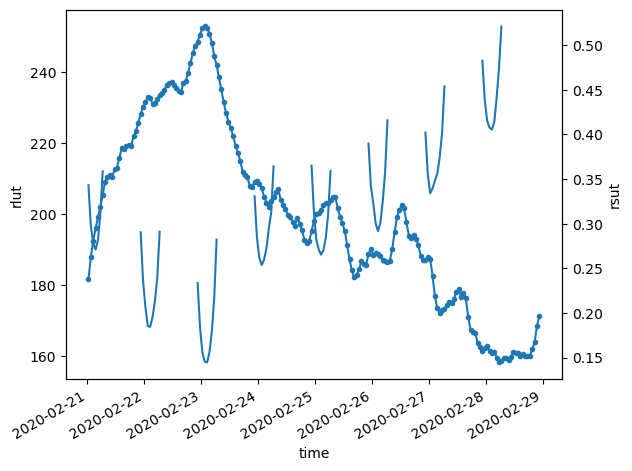

In [64]:
# sanity check on lw and sw cre
if plot_2d:
    if model=="UM":
        nax = (1,2)
    else:
        nax=(1)
    if plot_cre:
        swcre.mean(axis=nax).plot(marker='.')
        lwcre.mean(axis=nax).plot()
        netcre.mean(axis=nax).plot()
        plt.show()
    else:
        olr.mean(axis=nax).plot(marker='.')
        alb.mean(axis=nax).plot(ax=plt.gca().twinx())
        plt.show()

In [65]:
# calculate iwp percentiles
# may as well bin rhi by iwp right now too
bins = np.arange(0,100.1,4)
iwp_bins = np.zeros(26)
iwp_percs = np.zeros(iwp.shape)
dat_iwp = np.zeros((len(bins)-1, data.shape[1]))
lwcre_iwp = np.zeros(len(bins)-1)
swcre_iwp = np.zeros(len(bins)-1)
netcre_iwp = np.zeros(len(bins)-1)
olr_iwp = np.zeros(len(bins)-1)
alb_iwp = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    perc_thres_lower = np.nanpercentile(iwp, bins[i])
    perc_thres_upper = np.nanpercentile(iwp, bins[i+1])
    if i%5==0:
        print(i, perc_thres_upper*1000, "g/m2")
    else:
        print("...")
    if i==0:
        iwp_bins[0] = perc_thres_lower
    iwp_bins[i+1] = perc_thres_upper
    if model=="UM":
        dat_iwp[i,:] = data.where((iwp_expand>=perc_thres_lower)&(iwp_expand<perc_thres_upper)).mean(skipna=True, axis=(0,2,3))
    else:
        dat_iwp[i,:] = data.where((iwp_expand>=perc_thres_lower)&(iwp_expand<perc_thres_upper)).mean(skipna=True, axis=(0,2))
    if plot_2d:
        if plot_cre:
            lwcre_iwp[i] = np.nanmean(np.where((iwp>=perc_thres_lower)&(iwp<perc_thres_upper), 
                                             lwcre, np.nan))
            swcre_iwp[i] = np.nanmean(np.where((iwp>=perc_thres_lower)&(iwp<perc_thres_upper), 
                                             swcre, np.nan))
            netcre_iwp[i] = np.nanmean(np.where((iwp>=perc_thres_lower)&(iwp<perc_thres_upper), 
                                             netcre, np.nan))
        else:
            olr_iwp[i] = np.nanmean(np.where((iwp>=perc_thres_lower)&(iwp<perc_thres_upper), 
                                             olr, np.nan))
            alb_iwp[i] = np.nanmean(np.where((iwp>=perc_thres_lower)&(iwp<perc_thres_upper), 
                                             alb, np.nan))


[########################################] | 100% Completed | 2.91 ss
[########################################] | 100% Completed | 3.01 s
[########################################] | 100% Completed | 3.11 s
[########################################] | 100% Completed | 202.21 ms
[########################################] | 100% Completed | 302.08 ms
[########################################] | 100% Completed | 402.01 ms
0 0.3124605864286423 g/m2
[########################################] | 100% Completed | 7.33 ss
[########################################] | 100% Completed | 7.43 s
[########################################] | 100% Completed | 7.53 s
[########################################] | 100% Completed | 201.65 ms
[########################################] | 100% Completed | 301.81 ms
[########################################] | 100% Completed | 402.17 ms
[########################################] | 100% Completed | 100.84 ms
[########################################] | 100% Comp

In [66]:
iwp_bins[::5]*1000#, np.format_float_positional(iwp_bins[::5], precision=2, unique=False, fractional=False, trim='k')

array([0.00000000e+00, 4.27191593e+00, 1.84518810e+01, 5.03154993e+01,
       1.52441865e+02, 4.57926407e+04])

plotting iwc
[########################################] | 100% Completed | 1.61 ss
[########################################] | 100% Completed | 1.71 s
[########################################] | 100% Completed | 1.71 s
[########################################] | 100% Completed | 603.93 ms
[########################################] | 100% Completed | 604.38 ms
[########################################] | 100% Completed | 704.03 ms
[########################################] | 100% Completed | 628.23 ms
[########################################] | 100% Completed | 728.55 ms
[########################################] | 100% Completed | 828.24 ms


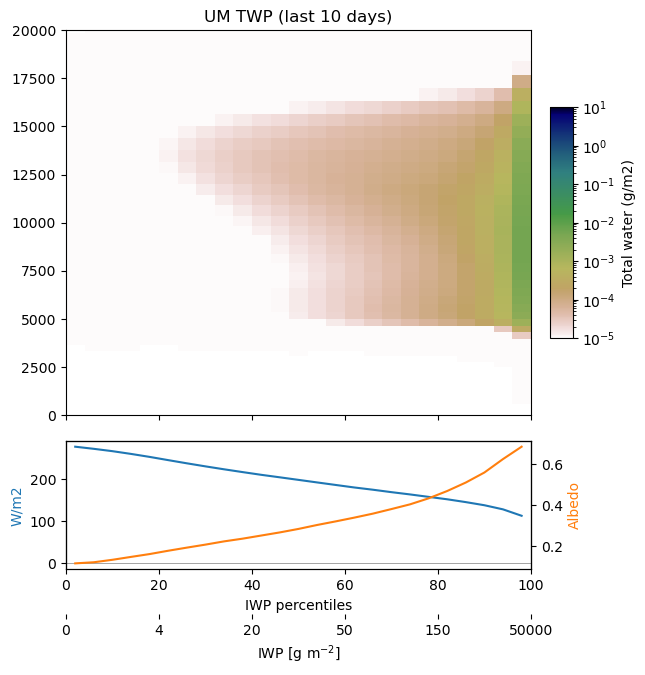

In [67]:
# plot IWC in iwp space 
iwp_bins_plot=[0,4,20,50,150,50    dat_iwp[i,:] = data.where((iwp_expand>=perc_thres_lower)&(iwp_expand<perc_thres_upper)).mean(skipna=True, axis=(0,2))
000]

fig, ax = plt.subplots(2,1, figsize=(6,7), sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace':0.1})
bin_mid = (bins[:-1]+bins[1:])/2
## axis 0 - iwc in iwp space
if plot_iwc:
    print("plotting iwc")
    levs = np.logspace(-5,1,20)
    cmap = "gist_earth_r"
    norm=mcolors.LogNorm(vmin=1e-5, vmax=1e1)
elif plot_rhice:
    print("plotting rh ice")
    levs = np.linspace(40,110,15)
    cmap = "viridis"
    norm=None
else:
    raise Exception("what am i plotting")
# pci = ax[0].contourf(bin_mid, z_plot, dat_iwp.T*1000, levs=levs, cmap=cmap, norm=norm)
pci = ax[0].pcolormesh(bin_mid, z_plot, (dat_iwp*1000).T, cmap=cmap, norm=norm)
ax[0].set(ylim=[0, 20000], xlim=[0,100])
cax = ax[0].inset_axes([1.04, 0.2, 0.05, 0.6])
if plot_iwc:
    plt.colorbar(pci, cax=cax, label="Total water (g/m2)", shrink=0.5) #""
elif plot_rhi:
    plt.colorbar(pci, cax=cax, label="RHice (%)", shrink=0.5) #"Total water (g/m2)"
## axis 1 - mean lw, sw and net cre in iwp space 
if plot_2d:
    if plot_cre:
        ax[1].plot(bin_mid, lwcre_iwp, color="C0", label="LW CRE")
        ax[1].plot(bin_mid, swcre_iwp, color="C1", label="SW CRE")
        ax[1].plot(bin_mid,netcre_iwp, color="C2", label="Net CRE")
    else:
        ax[1].plot(bin_mid, olr_iwp, color="C0", label="OLR")
        axt = ax[1].twinx()
        axt.plot(bin_mid, alb_iwp, color="C1", label="Albedo")
        axt.set(ylabel="Albedo")
        ax[1].yaxis.label.set_color("C0")
        axt.yaxis.label.set_color("C1")
ax[1].set(xlabel="IWP percentiles", ylabel="W/m2")
ax[1].axhline(0,0,100,color='k',alpha=0.5, lw=0.5)
ax[0].set_title("{} {} (last {} days)".format(model, region, ndays))

ax2 = ax[1].twiny()
new_tick_locations =bins[::5] #xbin_perc
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(iwp_bins_plot)
# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.35))
ax2.spines['bottom'].set_visible(False)
ax2.set_xlabel('IWP [g m$^{-2}$]')

if plot_cre:
    model=model+"_2d-cre"
elif plot_2d:
    model=model+"_2d-rad"
if plot_iwc:
    plt.savefig("../plots/{}_{}_iwc_iwp-space.png".format(region, model), bbox_inches="tight", pad_inches=0.1)
elif plot_rhice:
    plt.savefig("../plots/{}_{}_rhice_iwp-space.png".format(region, model), bbox_inches="tight", pad_inches=0.1)
model = model.split("_")[0]
plt.show()

# IWP histogram with vertical lines to show bins

[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100.]
0 SCREAM
... getting iwp and calculating percentiles...
[########################################] | 100% Completed | 605.75 ms
[########################################] | 100% Completed | 705.00 ms
[########################################] | 100% Completed | 804.54 ms
	 [0.00000000e+00 1.06801799e-11 3.51142606e-07 7.34705548e-06
 2.47042924e-05 4.99636881e-05 8.45702089e-05 1.32006040e-04
 1.98395355e-04 2.92869168e-04 4.32267087e-04 6.62074715e-04
 1.06088112e-03 1.81980816e-03 3.38246441e-03 7.01109599e-03
 1.68069623e-02 4.82511824e-02 1.74205922e-01 8.50485995e-01
 8.58662338e+01]
... counting for histogram...
[########################################] | 100% Completed | 513.03 ms
[########################################] | 100% Completed | 611.85 ms
[########################################] | 100% Completed | 604.67 ms
... plotting...
	... vlin

FileNotFoundError: [Errno 2] No such file or directory: '../plots/{}/{}_{}_iwp_hist_iceonly.png'

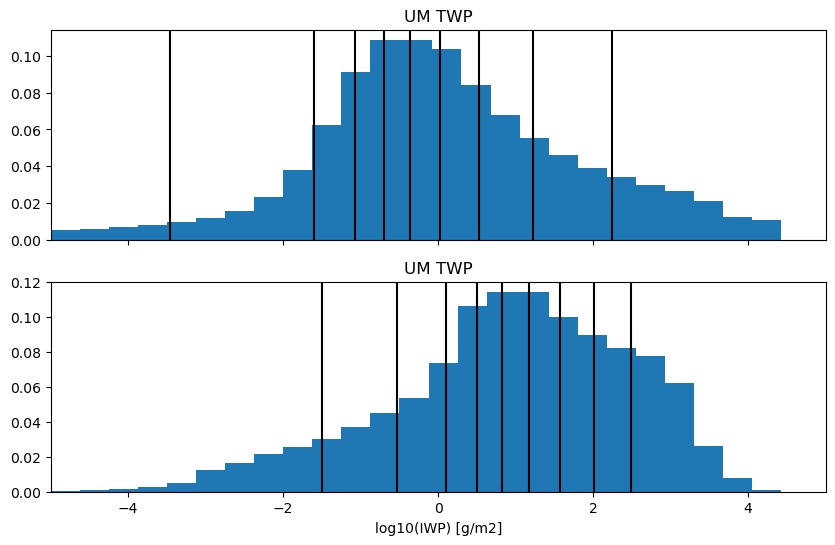

In [35]:
total_ice = False
# models = ["SCREAM", "SHiELD", "GEOS", "IFS"]
models = ["SCREAM", "SHiELD"]
iwp_bins = np.linspace(-5,4,25)
per_bins = np.arange(0,100.1,5)
print(bins)

fig, ax = plt.subplots(len(models), 1, figsize=(10,3*len(models)), sharex=True)
for i,m in enumerate(models):
    print(i,m)
    if m is not None:
        print("... getting iwp and calculating percentiles...")
        iwp = ap.load_iwp(m, region, total=total_ice, chunks=chunks)
        percs = np.nanpercentile(iwp, per_bins)
        print("\t",percs)
        print("... counting for histogram...")
        iwp_flat = iwp.values.flatten()
        del iwp
        counts, _ = np.histogram(np.log10(iwp_flat)+3, bins=iwp_bins)
        counts = counts/len(iwp_flat)
        del iwp_flat
        print("... plotting...")
        ax[i].bar(iwp_bins[:-1], counts, align="edge")
        print("\t... vlines for iwp percentiles...")
        for j in range(len(per_bins)//2):
            print("\t...",j)
            ax[i].axvline(np.log10(percs[j*2])+3, color="k")
        print("...done",i+1,"of",len(models))
        ax[i].set(title="{} {}".format(model, region))
        
        # ax[i].set(xscale="log")
ax[0].set(xlim=[-5,5])
ax[-1].set(xlabel="log10(IWP) [g/m2]")
                  
if total_ice:
    plt.savefig("../plots/{}/{}_{}_iwp_hist_totalice.png",dpi=150)
else:
    plt.savefig("../plots/{}/{}_{}_iwp_hist_iceonly.png",dpi=150)

plt.show()
    